# Google Play Store Apps Visualization

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams

%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore.csv


In [2]:
data = pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.shape

(10841, 13)

The Dataset contains 10841 records with 13 fields

In [4]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

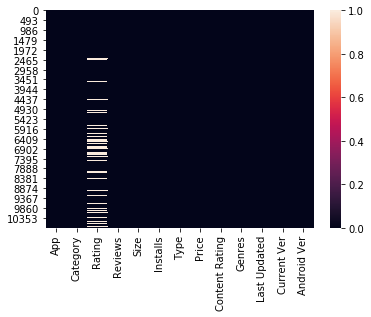

In [5]:
#Finding the missing data
sb.heatmap(pd.isnull(data))

In [6]:
#Evaluating the missing values
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values

Rating            1474
Current Ver          8
Android Ver          3
Content Rating       1
Type                 1
Last Updated         0
Genres               0
Price                0
Installs             0
Size                 0
Reviews              0
Category             0
App                  0
dtype: int64

In [7]:
#Dropping the Missing values
data.dropna(how = 'any', inplace = True)
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values

Android Ver       0
Current Ver       0
Last Updated      0
Genres            0
Content Rating    0
Price             0
Type              0
Installs          0
Size              0
Reviews           0
Rating            0
Category          0
App               0
dtype: int64

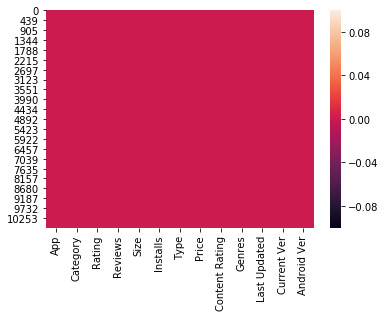

In [8]:
sb.heatmap(pd.isnull(data))

In [9]:
data.shape

(9360, 13)

After removing the missing values now the dataset contains 9360 records with 13 fields

### Rating

In [10]:
#Evaluating the data for Rating field
data['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Count of Apps ')

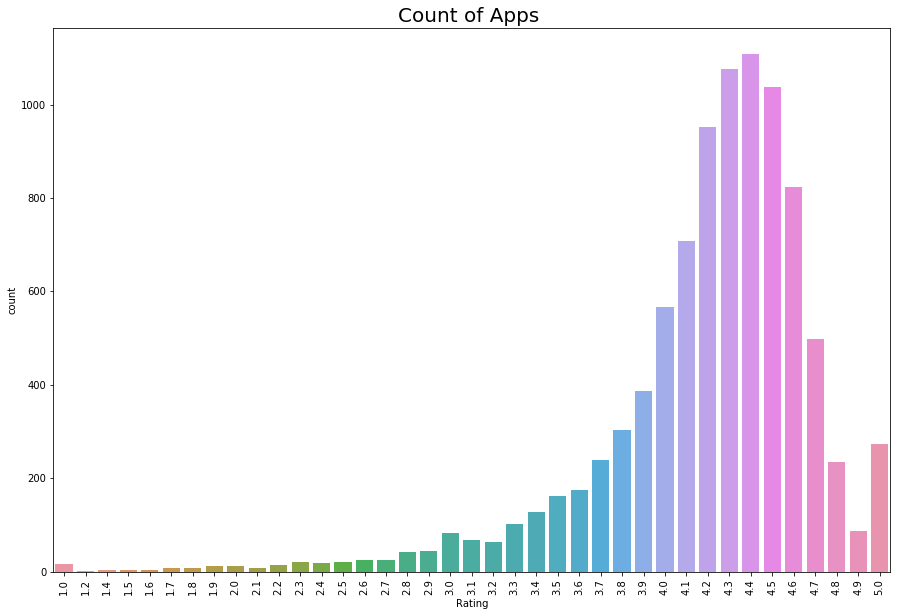

In [11]:
plt.rcParams['figure.figsize'] = (15, 10)
count_graph = sb.countplot(data['Rating'])
count_graph.set_xticklabels(count_graph.get_xticklabels(), rotation = 90)
count_graph
plt.title('Count of Apps ', size = 20)

Text(0.5, 1.0, 'Rating Distribution')

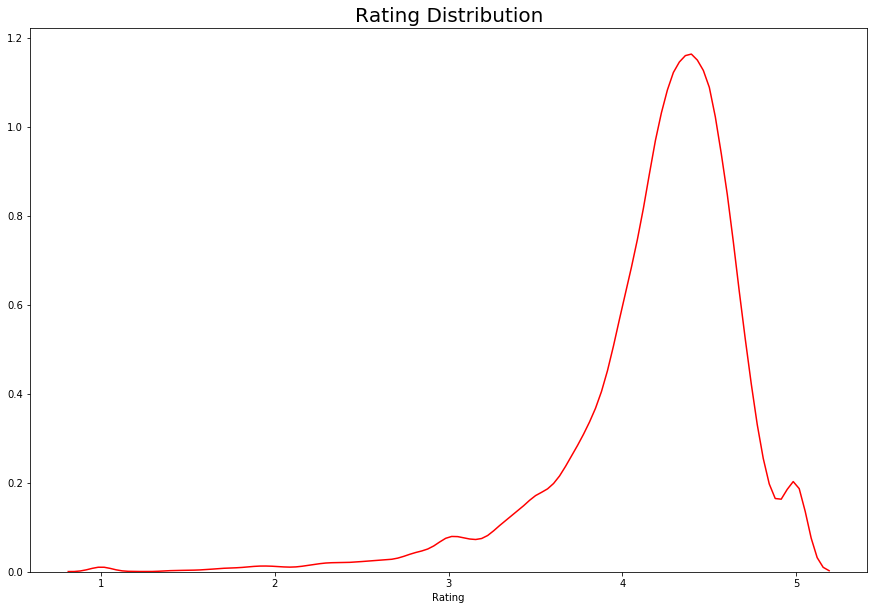

In [12]:
plt.rcParams['figure.figsize'] = (15, 10)
sb.distplot(data.Rating, color = 'red', hist = False)
plt.title('Rating Distribution', size = 20)

From the above graph we can state that most of the apps in the Google Playstore are rated in between 4 to 5 stars.

### Category

In [13]:
#Categorical Evaluation of Apps
print(data['Category'].unique())
print('\n', len(data['Category'].unique()), 'Categories')

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']

 33 Categories


Text(0.5, 1.0, 'Count of Apps in each Category')

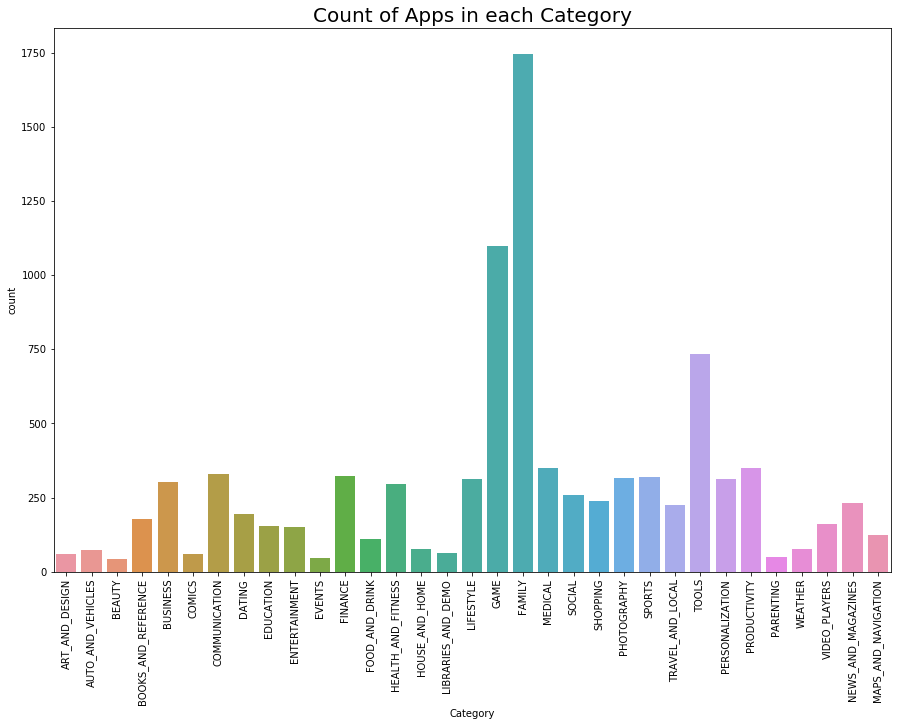

In [14]:
plt.rcParams['figure.figsize'] = (15, 10)
count_graph = sb.countplot(data['Category'])
count_graph.set_xticklabels(count_graph.get_xticklabels(), rotation = 90)
count_graph
plt.title('Count of Apps in each Category', size = 20)

Game and Family category has the highest count of apps in the Play store.

### Comparision between Rating and Category

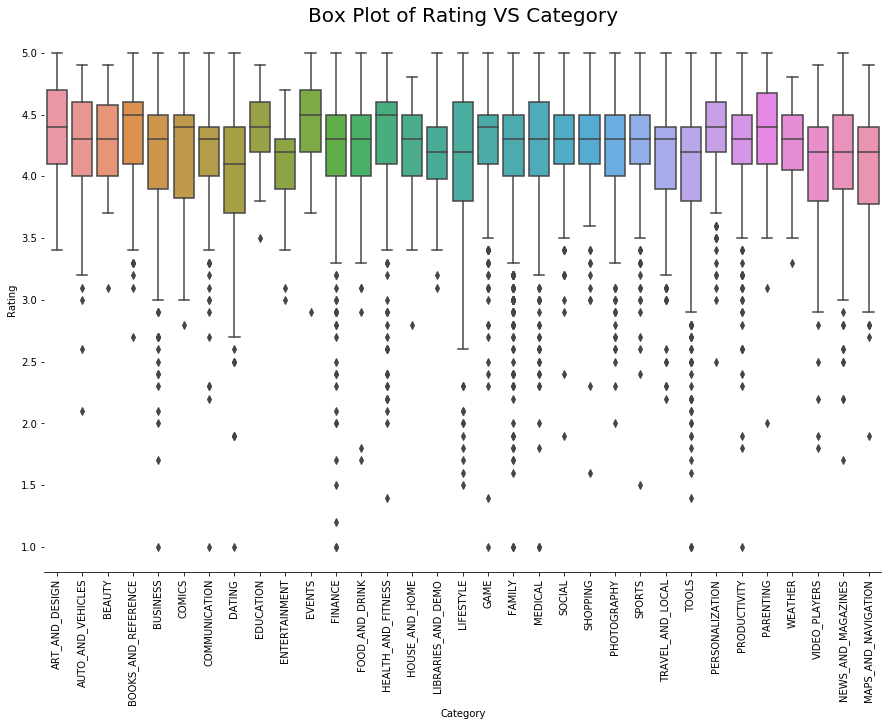

In [15]:
plt.rcParams['figure.figsize'] = (15, 10)
graph = sb.boxplot(y = data['Rating'], x = data['Category'])
sb.despine(left = True)
graph.set_xticklabels(graph.get_xticklabels(), rotation = 90)
graph
plt.title('Box Plot of Rating VS Category', size = 20)
plt.show()

From the above comparision graph we can say that Rating for apps in each Category is not much different and each category has apps rated between 4 to 5 stars in store.

### Reviews

In [16]:
#Evaluating the data for Reviews
data['Reviews'].describe()

count     9360
unique    5990
top          2
freq        83
Name: Reviews, dtype: object

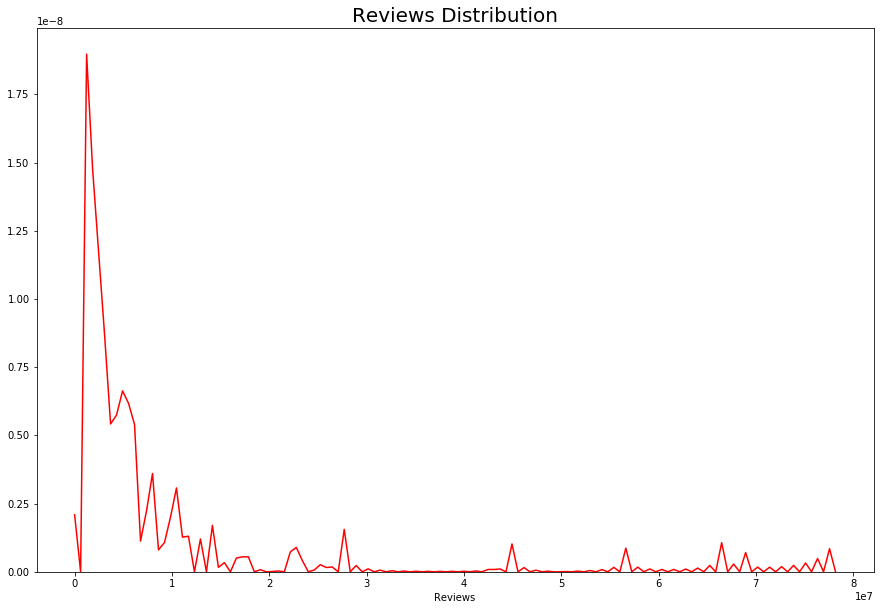

In [17]:
plt.rcParams['figure.figsize'] = (15, 10)
sb.distplot(data.Reviews, color = 'red', hist = False)
plt.title('Reviews Distribution', size = 20)
plt.show()


From the above graph we can state that most of the apps have less than 1M reviews and popular apps have more reviews.

### Comparision between Ratings and Reviews

In [18]:
#Convertings the Reviews object data into int type to plot comparision graph 
data['Reviews'] = data['Reviews'].apply(lambda x: int(x))

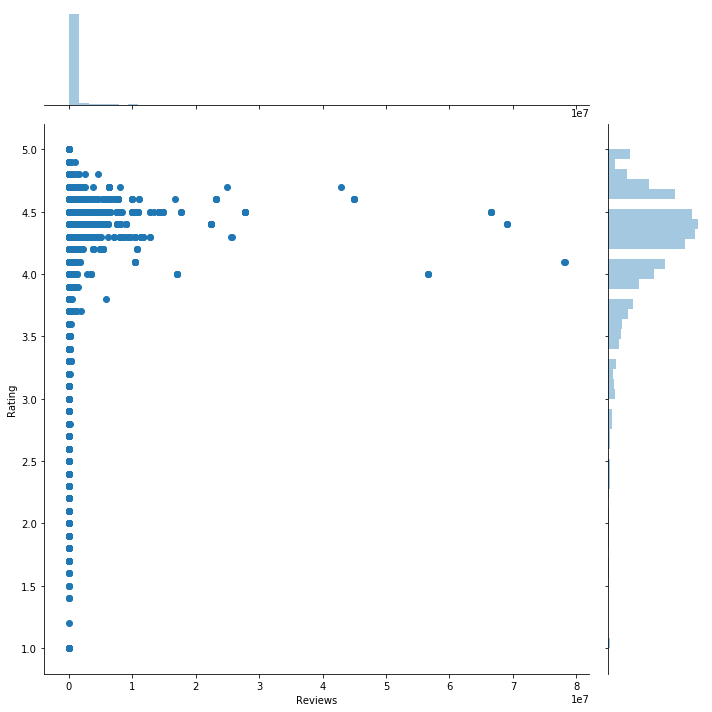

In [19]:
rcParams['figure.figsize'] = (15, 10)
sb.jointplot(data = data, x = "Reviews", y = "Rating", size = 10)

Text(0.5, 1.0, 'Reviews VS Rating')

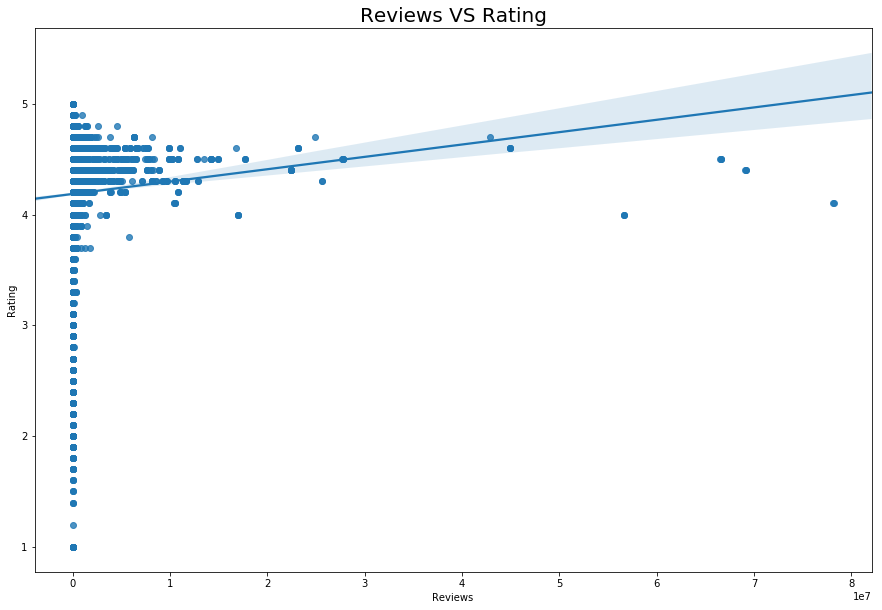

In [20]:
rcParams['figure.figsize'] = (15, 10)
sb.regplot(data = data, x = 'Reviews', y = 'Rating')
plt.title('Reviews VS Rating', size = 20)

From the graph we can say that most of the apps that have high rating also have good reviews.

### Size

In [21]:
data['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [22]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

The data is still in object and most the app size varies with device, so we will filter those apps.

In [23]:
len(data[data.Size == 'Varies with device'])

1637

There are 1637 apps whose size may vary depending on the device.

In [24]:
data['Size'].replace('Varies with device', np.nan , inplace = True)

In [25]:
#Converting the object data type into int 
data.Size = (data.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             data.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

In [26]:
data['Size'].fillna(data.groupby('Category')['Size'].transform('mean'), inplace = True)

'Varies with device' is filled by mean of the size for each category.

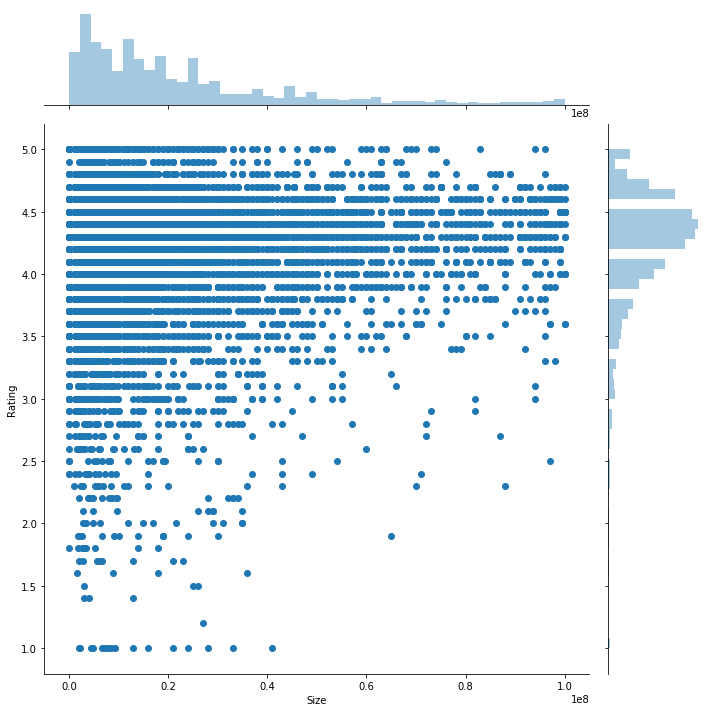

In [27]:
rcParams['figure.figsize'] = (15, 10)
sb.jointplot(x = 'Size', y = 'Rating', data = data, size = 10 )

### Installs

In [28]:
data['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [29]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

Text(0.5, 1.0, 'Count of Apps ')

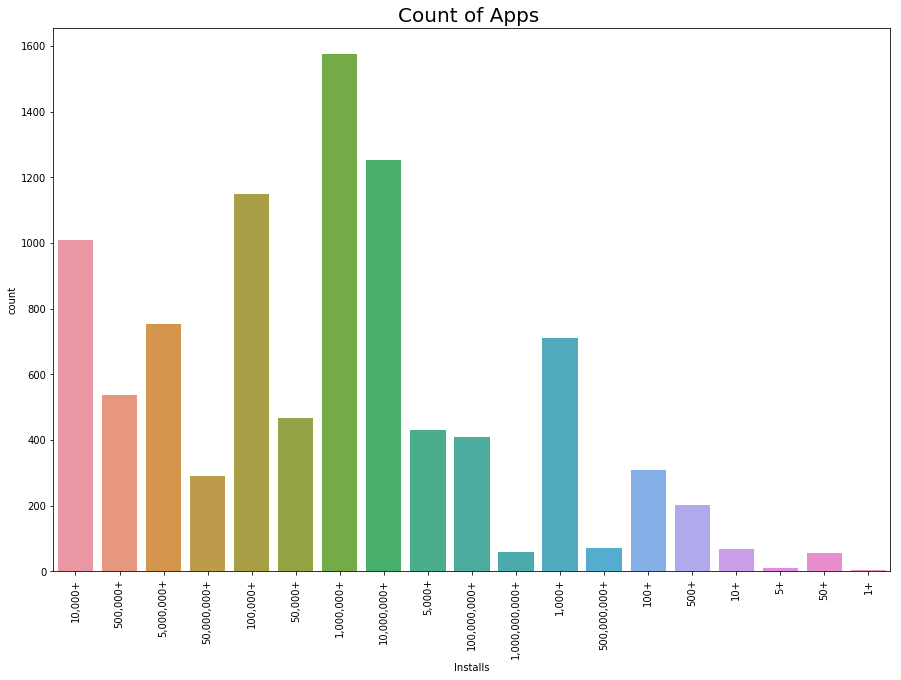

In [30]:
plt.rcParams['figure.figsize'] = (15, 10)
count_graph = sb.countplot(data['Installs'])
count_graph.set_xticklabels(count_graph.get_xticklabels(), rotation = 90)
count_graph
plt.title('Count of Apps ', size = 20)

The data is still in object type.

In [31]:
#Converting the Object data into interger data
data.Installs = data.Installs.apply(lambda x: x.replace(',',''))
data.Installs = data.Installs.apply(lambda x: x.replace('+',''))
data.Installs = data.Installs.apply(lambda x: int(x))

In [32]:
data['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

In [33]:
#Sorting the values
sorted_value = sorted(list(data['Installs'].unique()))

In [34]:
data['Installs'].replace(sorted_value, range(0, len(sorted_value), 1), inplace = True)


### Comparision between Ratings and Installs

Text(0.5, 1.0, 'Ratings VS Installs')

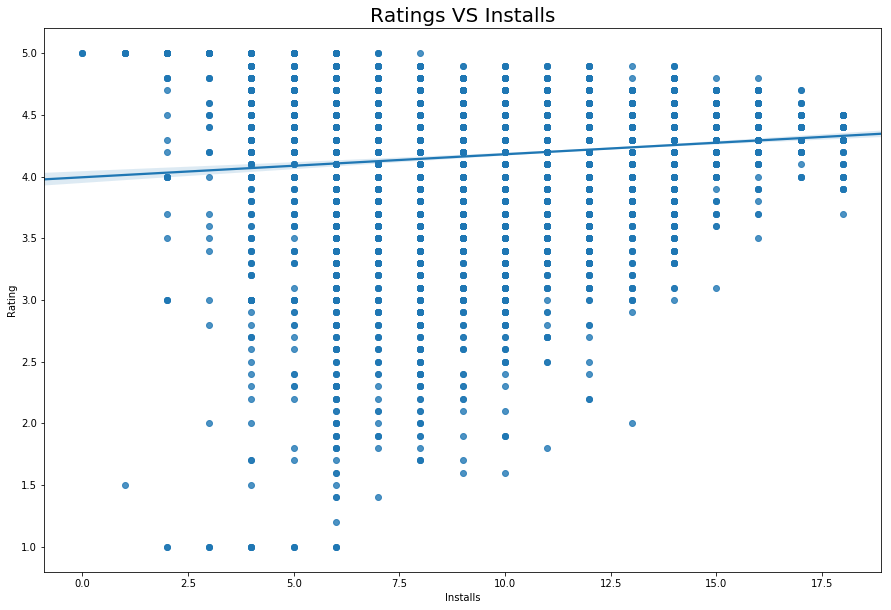

In [35]:
rcParams['figure.figsize'] = (15, 10)
sb.regplot(x = 'Installs', y = 'Rating', data = data)
plt.title("Ratings VS Installs", size = 20)


From the above graph we say state that the no of installs affects the rating of the apps

### Type

In [36]:
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

Text(0.5, 1.0, 'Count of Apps ')

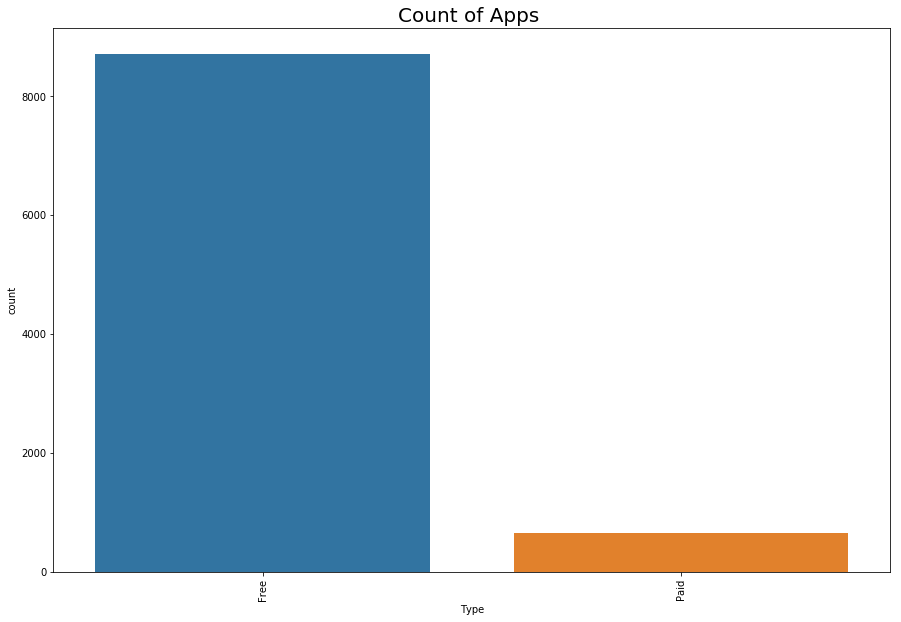

In [37]:
plt.rcParams['figure.figsize'] = (15, 10)
count_graph = sb.countplot(data['Type'])
count_graph.set_xticklabels(count_graph.get_xticklabels(), rotation = 90)
count_graph
plt.title('Count of Apps ', size = 20)

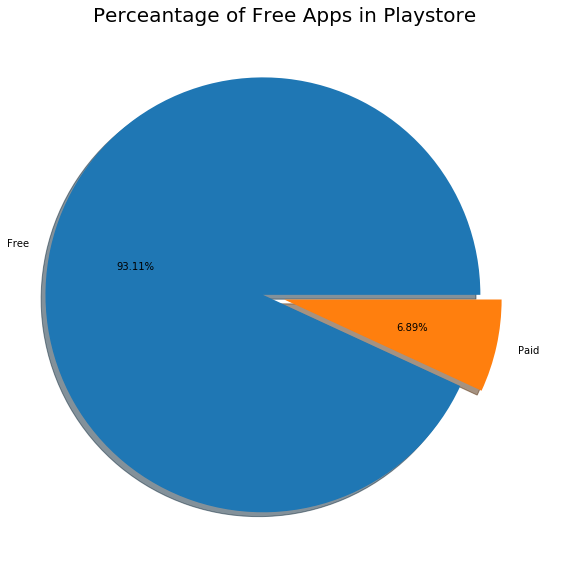

In [38]:
labels = data['Type'].value_counts(sort = True).index
size = data['Type'].value_counts(sort = True)

explode = (0.1, 0)

rcParams['figure.figsize'] = (10, 10)

plt.pie(size, explode = explode, labels = labels, autopct = '%.2f%%', shadow = True)

plt.title("Perceantage of Free Apps in Playstore", size = 20)
plt.show()

From the above chart we can say that 93.11% of the apps in the Playstore are Free.

### Price

In [39]:
#For Evaluation of Paid Apps only, I will consider the all the free apps as a single record
data['Free'] = data['Type'].map(lambda s :1  if s =='Free' else 0)
data.drop(['Type'], axis=1, inplace=True)

In [40]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [41]:
data.Price = data.Price.apply(lambda x: x.replace('$',''))
data['Price'] = data['Price'].apply(lambda x: float(x))

In [42]:
data['Price'].describe()

count    9360.000000
mean        0.961279
std        15.821640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

Average price of paid apps is 0.96 dollars and most expensive app is at price 400 dollars.

### Comparison between Rating and Price

Text(0.5, 1.0, ' Price VS Rating')

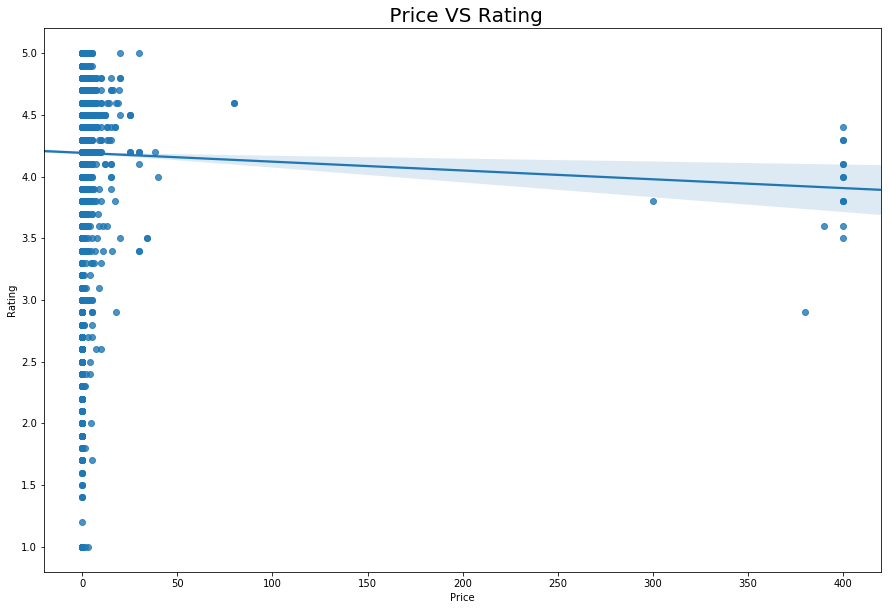

In [43]:
rcParams['figure.figsize'] = (15, 10)
sb.regplot(x = 'Price', y = 'Rating', data = data)
plt.title(" Price VS Rating", size = 20)

If the app price is high but does not match expectations of the user then the app may get low rating.

### Content Rating

In [44]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Text(0.5, 1.0, 'Count of Apps ')

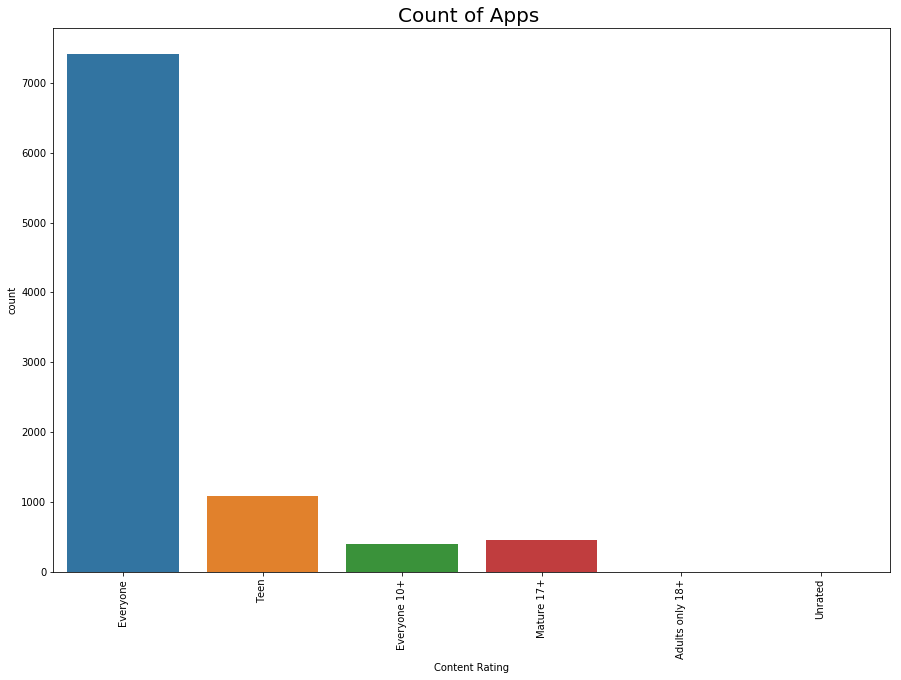

In [45]:
plt.rcParams['figure.figsize'] = (15, 10)
count_graph = sb.countplot(data['Content Rating'])
count_graph.set_xticklabels(count_graph.get_xticklabels(), rotation = 90)
count_graph
plt.title('Count of Apps ', size = 20)

Text(0.5, 1.0, 'Content Rating VS Rating')

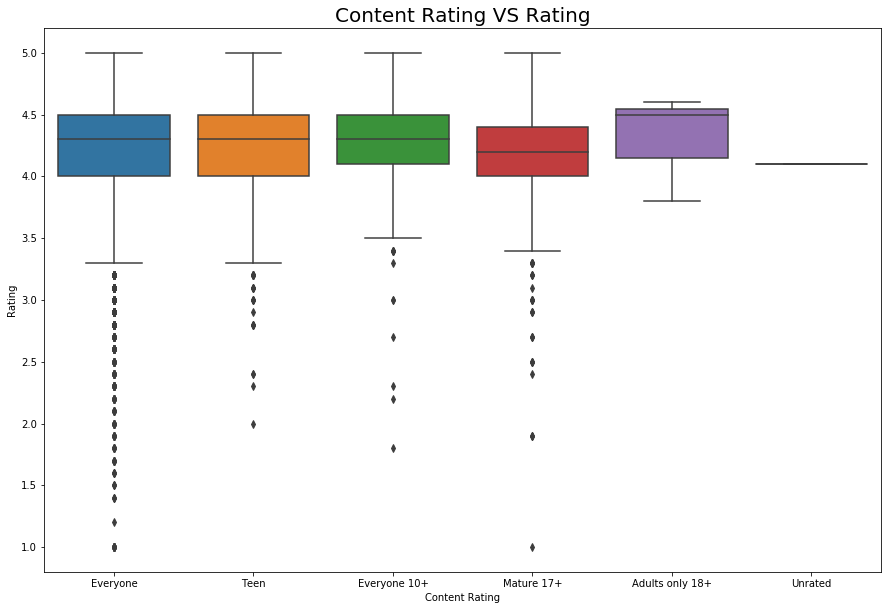

In [46]:
rcParams['figure.figsize'] = (15, 10)
sb.boxplot(x = 'Content Rating', y = 'Rating', data = data)
plt.title("Content Rating VS Rating", size = 20)

Content Rating does not affect much the overall rating of the app, but the adult apps seems to have low rating when compared to other apps.

### Genres

In [47]:
data['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [48]:
len(data['Genres'].unique())

115

In [49]:
data.Genres.value_counts()

Tools                          732
Entertainment                  533
Education                      468
Action                         358
Productivity                   351
                              ... 
Board;Pretend Play               1
Racing;Pretend Play              1
Role Playing;Brain Games         1
Music & Audio;Music & Video      1
Comics;Creativity                1
Name: Genres, Length: 115, dtype: int64

In [50]:
#Grouping to ignore sub-genre
data['Genres'] = data['Genres'].str.split(';').str[0]

In [51]:
print(data['Genres'].unique())
print('\n', len(data['Genres'].unique()), 'genres')

['Art & Design' 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business'
 'Comics' 'Communication' 'Dating' 'Education' 'Entertainment' 'Events'
 'Finance' 'Food & Drink' 'Health & Fitness' 'House & Home'
 'Libraries & Demo' 'Lifestyle' 'Adventure' 'Arcade' 'Casual' 'Card'
 'Action' 'Strategy' 'Puzzle' 'Sports' 'Music' 'Word' 'Racing'
 'Simulation' 'Board' 'Trivia' 'Role Playing' 'Educational'
 'Music & Audio' 'Video Players & Editors' 'Medical' 'Social' 'Shopping'
 'Photography' 'Travel & Local' 'Tools' 'Personalization' 'Productivity'
 'Parenting' 'Weather' 'News & Magazines' 'Maps & Navigation' 'Casino']

 48 genres


Text(0.5, 1.0, 'Count of Apps')

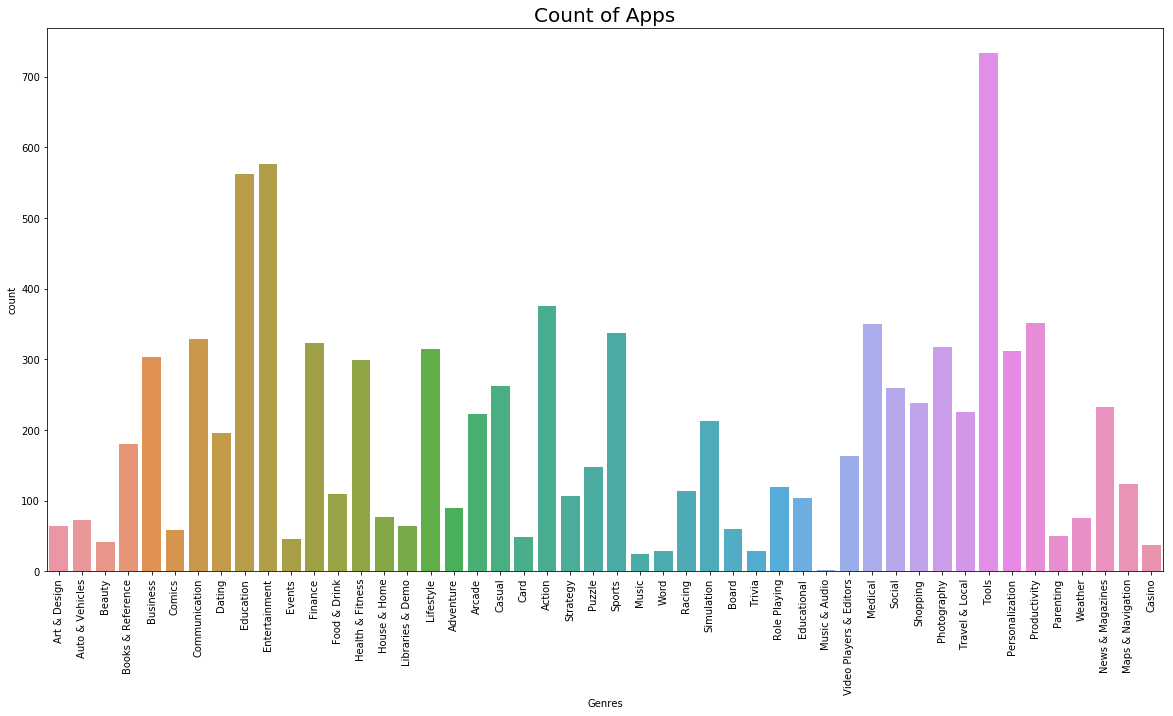

In [52]:
plt.rcParams['figure.figsize'] = (20, 10)
count_graph = sb.countplot(data['Genres'])
count_graph.set_xticklabels(count_graph.get_xticklabels(), rotation = 90)
count_graph
plt.title('Count of Apps', size = 20)

Text(0.5, 1.0, 'Rating VS Genres')

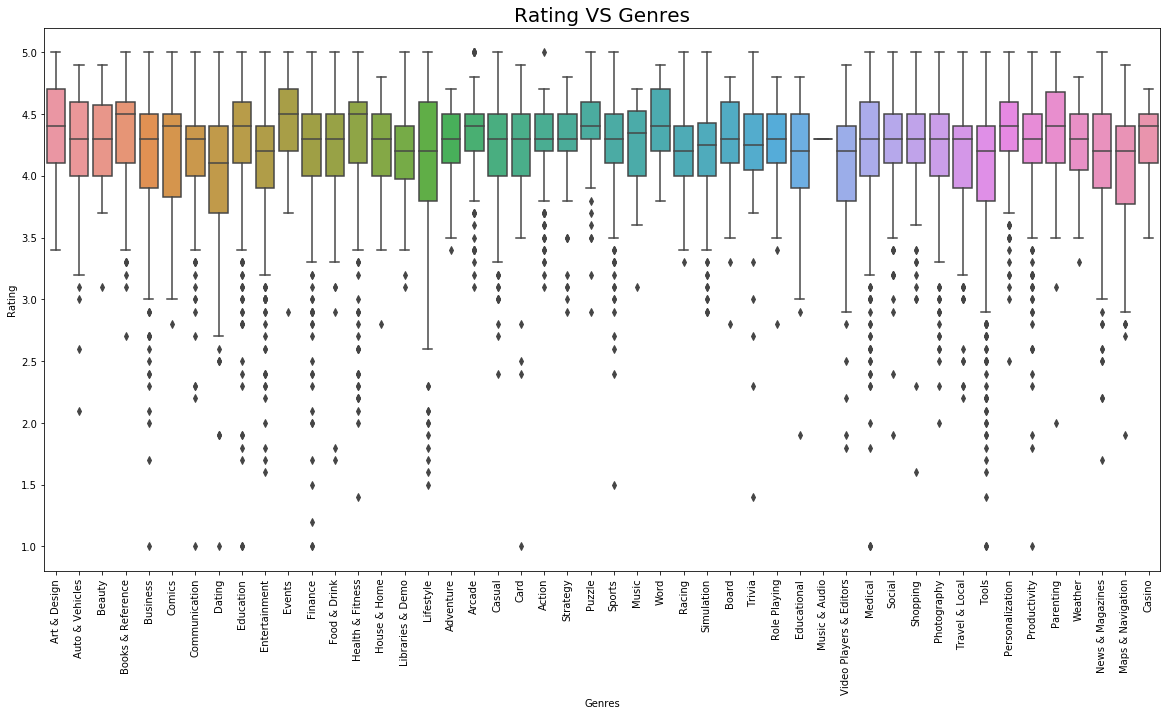

In [53]:
rcParams['figure.figsize'] = (20,10)
graph = sb.boxplot(x = 'Genres', y = 'Rating', data = data)
graph.set_xticklabels(graph.get_xticklabels(), rotation = 90)
graph
plt.title('Rating VS Genres', size = 20)